## Домашнее задание 3: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

**Пункты 1 и 3 при полном верном решении затем нормируются в 10-балльную шкалу.
Бонус учитывается отдельно.**

### Задание 1:  Визуализация решающих поверхностей в kNN.

Прочтите [статью](https://) про метод ближайших соседей. 

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
#нет пропущенных значений
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [4]:
#нет категориальных переменных
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
# масштабируем признаки
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

interest_columns = ['alcohol','magnesium']

scaler.fit(X_train[interest_columns])

X_train[interest_columns] = scaler.transform(X_train[interest_columns])
X_test[interest_columns] = scaler.transform(X_test[interest_columns])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#обученные классификаторы будем сохранять в датафрейм
parameter = [1,3,5,10,15,25]
pred_train = pd.DataFrame(columns = parameter)

print('Доля правильных ответов для каждого классификатора:')
models = list()

for i in range(0, 6):
    n_n_value = parameter[i]

    model = KNeighborsClassifier(n_neighbors=n_n_value, metric='euclidean')
    
    #сохраним классификаторы в список
    models.append(model.fit(X_train[interest_columns].to_numpy(), y_train))

    pred_train[n_n_value] = model.predict(X_train[interest_columns].to_numpy())
    pred_test = model.predict(X_test[interest_columns].to_numpy())

    print(f'N_neighbors = {n_n_value}, train accuracy = {accuracy_score(pred_train[n_n_value], y_train):.3}, test accuracy = {accuracy_score(pred_test, y_test):.3}')

Доля правильных ответов для каждого классификатора:
N_neighbors = 1, train accuracy = 1.0, test accuracy = 0.667
N_neighbors = 3, train accuracy = 0.806, test accuracy = 0.778
N_neighbors = 5, train accuracy = 0.75, test accuracy = 0.722
N_neighbors = 10, train accuracy = 0.734, test accuracy = 0.778
N_neighbors = 15, train accuracy = 0.734, test accuracy = 0.796
N_neighbors = 25, train accuracy = 0.669, test accuracy = 0.796


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

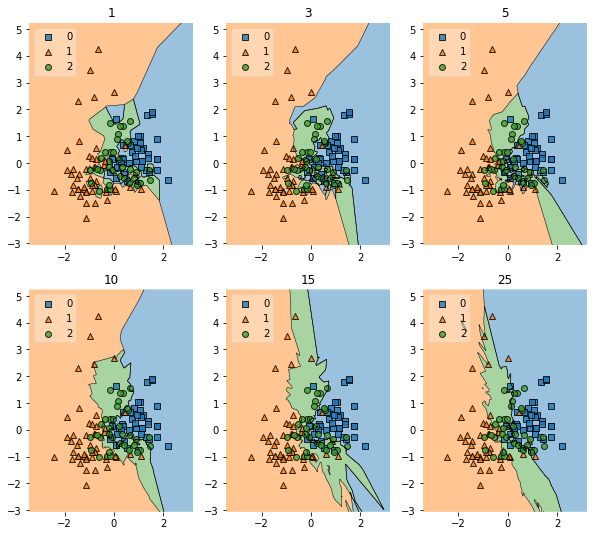

In [9]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(10, 9))

labels = parameter
place = [i for i in itertools.product([0, 1, 2], repeat=2)]
X = X_train[interest_columns].to_numpy()

for clf, lab, grd in zip(models,
                         labels,
                         place[:6]):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y_train,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Прокомментируйте результаты, полученные в задачах 1.3 и 1.5

1. При k=1 на тестовой выборке accuracy_score алгоритма равна единице - этого следовало ожидать из логики работы KNN классификатора.
2. Accuracy_score на тесте и трейне отличаются на +4%...-16% - сильно и в обе стороны. Особенность алгоритма.

Какое число соседей оптимально использовать для обучения классификатора?
k=10 оптимально. 
Пояснение: Посмотрим на график с k=1, k=3, k=5. Поверхности сильно искривлены, вогнуты друг в друга, имеют "островки", сооветствующие отдельным точкам. Это признак переобучения, что подтверждается более низким значением accuracy_score по сравнению с k=10, k=15, k=25. Выбирая между последними тремя, останавливаюсь на k=10 из-за более гладкой формы решающей поверхности в верхней и нижней части графика.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных, содержащих информацию об автомобилях и их стоимости.

In [10]:
data = pd.read_csv('Automobile.csv', na_values = ['?'])
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Мы будем решать задачу предсказания стоимости автомобиля `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Обработайте их любым способом.

* если пропусков в столбце мало, можете удалить их
* если пропусков много, лучше заполнить их средним значением или медианой (по столбцу).

In [11]:
#для normalized-losses заполним пропуски медианой
data['normalized-losses'].fillna(data['normalized-losses'].median(), inplace=True)

In [12]:
#для остальных удалим
data.dropna(inplace = True)

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [13]:
#не найдено бессмысленных

**Задача 3.3 (0.1 балла)** Постройте матрицу корреляций.

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [14]:
data.corr().loc['price'].sort_values()

#Сильнее всего коррелируют:
# потребление топлива (highway-mpg, city-mpg)
# размер двигателя (engine-size)
# масса (curb-weight)
# мощность (horsepower)
# ширина и длина (length, width)

highway-mpg         -0.719178
city-mpg            -0.706618
peak-rpm            -0.103835
symboling           -0.084835
compression-ratio    0.074483
stroke               0.096007
normalized-losses    0.097696
height               0.136234
bore                 0.546295
wheel-base           0.584951
length               0.695928
width                0.754649
horsepower           0.812453
curb-weight          0.835368
engine-size          0.888778
price                1.000000
Name: price, dtype: float64

In [15]:
#признаки между собой
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.444987,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
normalized-losses,0.444987,1.000000,-0.062453,0.005691,0.069490,-0.352688,0.074353,0.104208,-0.045558,0.047360,-0.111904,0.181163,0.218424,-0.174087,-0.131924,0.097696
wheel-base,-0.536516,-0.062453,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,-0.363194,0.005691,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,-0.247741,0.069490,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.517803,-0.352688,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.231086,0.074353,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine-size,-0.068327,0.104208,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,-0.144785,-0.045558,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,-0.010884,0.047360,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007


**Задача 3.4 (0.1 балла)** Закодируйте категориальные признаки.

Можете использовать любые кодировки из библиотеки target_encoders или же OneHotEncoder из sklearn.

In [16]:
#кодирую
numerical_culumns = data.select_dtypes(include='number').columns.drop(['price'])
data_cod = pd.get_dummies(data, drop_first = True)

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [17]:
y = data['price']
X = data_cod.drop('price', axis = 1)

In [18]:
np.random.RandomState = 101010
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train[numerical_culumns])

X_train[numerical_culumns] = scaler.transform(X_train[numerical_culumns])
X_test[numerical_culumns] = scaler.transform(X_test[numerical_culumns])


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках, а также r2.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print('LEAST SQUARE')
print(f'r2 for X_train: {r2_score(train_predict, y_train):.3}')
print(f'r2 for X_test : {r2_score(test_predict, y_test):.3}')
print(f'RMSE for X_train: {mean_squared_error(train_predict, y_train,squared = False):.5}')
print(f'RMSE for X_test : {mean_squared_error(test_predict, y_test,squared = False):.5}')

LEAST SQUARE
r2 for X_train: 0.982
r2 for X_test : 0.832
RMSE for X_train: 999.88
RMSE for X_test : 3214.6


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [21]:
#вывожу коэффициенты по убыванию модуля

for coef, name in sorted(zip(abs(model.coef_),X_test.columns)):
    print(f'{name}: {coef:.6}')

fuel-system_spfi: 0.0
num-of-cylinders_twelve: 3.63798e-12
normalized-losses: 15.2401
symboling: 103.347
make_honda: 124.481
stroke: 143.753
make_mercury: 290.35
make_volvo: 294.341
make_nissan: 323.068
engine-type_l: 426.005
drive-wheels_fwd: 457.381
make_mazda: 459.429
make_jaguar: 490.464
city-mpg: 574.125
peak-rpm: 777.69
make_volkswagen: 783.962
height: 849.19
num-of-cylinders_five: 1070.92
engine-type_ohc: 1111.18
highway-mpg: 1208.39
num-of-doors_two: 1223.87
num-of-cylinders_four: 1329.47
num-of-cylinders_six: 1405.49
horsepower: 1527.57
make_toyota: 1650.77
engine-type_ohcv: 1765.59
aspiration_turbo: 1777.53
make_mercedes-benz: 1825.37
drive-wheels_rwd: 1879.07
wheel-base: 1986.9
width: 2027.67
make_chevrolet: 2068.24
bore: 2103.92
make_isuzu: 2222.99
length: 2453.69
engine-size: 2497.4
fuel-system_spdi: 2722.87
fuel-system_mpfi: 2762.43
fuel-system_mfi: 2838.62
fuel-system_2bbl: 3165.3
body-style_sedan: 3212.37
make_audi: 3218.87
body-style_hatchback: 3468.94
body-style_hardt

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [22]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=10)
model_lasso.fit(X_train, y_train)

train_predict = model_lasso.predict(X_train)
test_predict = model_lasso.predict(X_test)

print('LASSO')
print(f'r2 for X_train: {r2_score(train_predict, y_train):.3}')
print(f'r2 for X_test : {r2_score(test_predict, y_test):.3}')
print(f'RMSE for X_train: {mean_squared_error(train_predict, y_train,squared = False):.5}')
print(f'RMSE for X_test : {mean_squared_error(test_predict, y_test,squared = False):.5}')


LASSO
r2 for X_train: 0.972
r2 for X_test : 0.864
RMSE for X_train: 1224.3
RMSE for X_test : 2988.6


In [23]:
#вывожу коэффициенты для Lasso по убыванию модуля
#Сильно ли уменьшились веса? - сильно, многие - в несколько раз. 17 весов обнулились.

print('LASSO')
for coef, name in sorted(zip(abs(model_lasso.coef_),X_test.columns)):
    print(f'{name}: {coef:.6}')

LASSO
drive-wheels_fwd: 0.0
engine-type_l: 0.0
engine-type_ohc: 0.0
engine-type_ohcf: 0.0
fuel-system_idi: 0.0
fuel-system_mfi: 0.0
fuel-system_spdi: 0.0
fuel-system_spfi: 0.0
fuel-type_gas: 0.0
make_chevrolet: 0.0
make_isuzu: 0.0
make_mazda: 0.0
make_mercury: 0.0
make_nissan: 0.0
make_saab: 0.0
num-of-cylinders_four: 0.0
num-of-cylinders_twelve: 0.0
normalized-losses: 16.4414
make_volvo: 24.3388
city-mpg: 84.8591
height: 87.3895
make_honda: 134.083
compression-ratio: 153.792
horsepower: 163.094
symboling: 230.786
num-of-cylinders_five: 234.432
highway-mpg: 237.152
fuel-system_2bbl: 350.508
peak-rpm: 388.224
fuel-system_mpfi: 466.74
wheel-base: 528.494
drive-wheels_rwd: 538.462
num-of-doors_two: 577.194
make_audi: 703.983
stroke: 713.067
make_subaru: 827.381
make_toyota: 834.628
make_volkswagen: 922.821
num-of-cylinders_six: 1009.4
length: 1076.92
make_dodge: 1092.26
engine-type_ohcv: 1140.74
make_plymouth: 1155.91
bore: 1219.08
aspiration_turbo: 1562.49
body-style_sedan: 1778.26
width

In [24]:
model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train)

train_predict = model_ridge.predict(X_train)
test_predict = model_ridge.predict(X_test)

print('RIDGE')
print(f'r2 for X_train: {r2_score(train_predict, y_train):.3}')
print(f'r2 for X_test : {r2_score(test_predict, y_test):.3}')
print(f'RMSE for X_train: {mean_squared_error(train_predict, y_train,squared = False):.5}')
print(f'RMSE for X_test : {mean_squared_error(test_predict, y_test,squared = False):.5}')

RIDGE
r2 for X_train: 0.909
r2 for X_test : 0.857
RMSE for X_train: 2080.4
RMSE for X_test : 3230.3


In [25]:
#вывожу коэффициенты для Ridge по убыванию модуля
#Сильно ли уменьшились веса? - сильно, сильнее, чем для Lasso, но не обнулились.

print('RIDGE')
for coef, name in sorted(zip(abs(model_ridge.coef_),X_test.columns)):
    print(f'{name}: {coef:.6}')

RIDGE
fuel-system_spfi: 0.0
num-of-cylinders_twelve: 0.0
make_mazda: 12.3712
make_plymouth: 45.9598
body-style_hardtop: 49.5007
make_honda: 119.389
fuel-type_gas: 121.946
fuel-system_idi: 121.946
height: 124.191
fuel-system_2bbl: 124.307
make_isuzu: 137.006
engine-type_l: 141.876
make_saab: 158.946
make_dodge: 159.426
make_peugot: 164.197
body-style_sedan: 171.414
normalized-losses: 173.441
fuel-system_mpfi: 173.653
highway-mpg: 177.679
fuel-system_mfi: 185.339
city-mpg: 186.412
num-of-cylinders_six: 200.162
make_chevrolet: 200.625
fuel-system_spdi: 220.627
num-of-doors_two: 237.017
num-of-cylinders_five: 247.982
make_volvo: 248.91
aspiration_turbo: 271.347
make_mercury: 281.106
wheel-base: 299.889
num-of-cylinders_three: 306.072
compression-ratio: 329.677
make_audi: 339.121
drive-wheels_fwd: 366.351
peak-rpm: 408.739
bore: 454.413
symboling: 498.484
engine-type_ohcf: 502.592
make_volkswagen: 513.585
length: 541.185
make_jaguar: 543.868
make_nissan: 609.225
drive-wheels_rwd: 675.302
ma

In [26]:
#Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

#Судя по тому, что в Lasso обнулились даже те признаки, которые в Ordinary Least Squares имели наибольшие веса (fuel-system_****, например), 
# а RMSE и R2_score в Lasso при этом улучшились, делаю вывод, что проблема мультиколлинеарности для датасета действительно имеет место. 


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [27]:
#Обучаю Lasso и Ridge регрессии и записываю результаты в словари

alpha = [0.1, 1, 10, 100, 200]
norms_ridge = dict()
norms_lasso = dict()

for norm_value in alpha:
    model_ridge = Ridge(alpha=norm_value)
    model_ridge.fit(X_train, y_train)
    norms_ridge[norm_value] = np.linalg.norm(model_ridge.coef_)

for norm_value in alpha:
    model_lasso = Lasso(alpha=norm_value)
    model_lasso.fit(X_train, y_train)
    norms_lasso[norm_value] = np.linalg.norm(model_lasso.coef_)

/home/eva/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.687e+07, tolerance: 7.641e+05
  model = cd_fast.enet_coordinate_descent(
/home/eva/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.125e+06, tolerance: 7.641e+05
  model = cd_fast.enet_coordinate_descent(


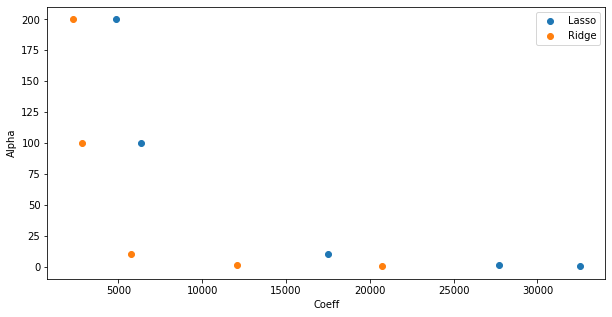

In [28]:
#Строю график зависимости Alpha от нормы вектора оценок коэффициентов
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(norms_lasso.values(), norms_lasso.keys(), label = 'Lasso')
plt.scatter(norms_ridge.values(), norms_ridge.keys(), label = 'Ridge')
plt.xlabel('Coeff')
plt.ylabel('Alpha')
plt.legend()
plt.show()

In [29]:
#Какой метод агрессивнее уменьшает веса?
#Метод Ridge агрессивнее уменьшает веса

#Поясните, почему Lasso-регрессию часто используют для отбора признаков.
#Потому что именно Lasso имеет возможность обнулять веса для признаков.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [30]:
from sklearn.linear_model import LassoCV

model_lasso_cv = LassoCV(alphas=alpha, cv=5)
model_lasso_cv.fit(X_train, y_train)


/home/eva/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4465940.615956128, tolerance: 550072.7229657408
  model = cd_fast.enet_coordinate_descent_gram(
/home/eva/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23254930.88549502, tolerance: 550072.7229657408
  model = cd_fast.enet_coordinate_descent_gram(
/home/eva/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8892859.827727765, tolerance: 628357.4733657409
  model = cd_fast.enet_coordinate_descent_gram(
/home/eva/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py

LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5)

In [31]:
#Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок)


for alpha, val in zip(model_lasso_cv.alphas_, 
                      model_lasso_cv.mse_path_):
    print(f'Alpha: {alpha:.4}, MSE: {val.mean():.3}')

Alpha: 200.0, MSE: 9.19e+06
Alpha: 100.0, MSE: 7.57e+06
Alpha: 10.0, MSE: 5.44e+06
Alpha: 1.0, MSE: 5.94e+06
Alpha: 0.1, MSE: 6.24e+06


In [32]:
#...и выберите то значение, которое даёт наибольшее качество. 

#Наибольшее качество даёт alpha = 10 (MSE = 5.4 млн)

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [33]:
model_lasso = Lasso(alpha=10)
model_lasso.fit(X_train, y_train)

print('20 самых неинформативных признаков')
for coef, name in sorted(zip(abs(model_lasso.coef_),X_train.columns))[:20]:
    print(f'{name}: {coef:.6}')

20 самых неинформативных признаков
drive-wheels_fwd: 0.0
engine-type_l: 0.0
engine-type_ohc: 0.0
engine-type_ohcf: 0.0
fuel-system_idi: 0.0
fuel-system_mfi: 0.0
fuel-system_spdi: 0.0
fuel-system_spfi: 0.0
fuel-type_gas: 0.0
make_chevrolet: 0.0
make_isuzu: 0.0
make_mazda: 0.0
make_mercury: 0.0
make_nissan: 0.0
make_saab: 0.0
num-of-cylinders_four: 0.0
num-of-cylinders_twelve: 0.0
normalized-losses: 16.4414
make_volvo: 24.3388
city-mpg: 84.8591


In [34]:
print('20 самых информативных признаков')
for coef, name in sorted(zip(abs(model_lasso.coef_),X_train.columns),reverse = True)[:20]:
    print(f'{name}: {coef:.6}')

20 самых информативных признаков
engine-location_rear: 11348.4
make_bmw: 6849.57
make_porsche: 5465.16
make_jaguar: 3872.58
curb-weight: 3495.7
make_mercedes-benz: 3090.75
num-of-cylinders_three: 3011.77
body-style_wagon: 3007.63
body-style_hatchback: 2404.96
make_peugot: 2390.08
body-style_hardtop: 2387.37
engine-size: 2078.87
make_mitsubishi: 2000.66
width: 1817.5
body-style_sedan: 1778.26
aspiration_turbo: 1562.49
bore: 1219.08
make_plymouth: 1155.91
engine-type_ohcv: 1140.74
make_dodge: 1092.26


In [42]:
#обнулившиеся признаки
for coef, name in sorted(zip(model_lasso.coef_,X_train.columns),reverse = True)[20:39]:
    print(f'{name}: {coef:.6}')

normalized-losses: 16.4414
num-of-cylinders_twelve: 0.0
num-of-cylinders_four: -0.0
make_saab: 0.0
make_nissan: 0.0
make_mercury: -0.0
make_mazda: 0.0
make_isuzu: -0.0
make_chevrolet: 0.0
fuel-type_gas: -0.0
fuel-system_spfi: 0.0
fuel-system_spdi: 0.0
fuel-system_mfi: -0.0
fuel-system_idi: 0.0
engine-type_ohcf: 0.0
engine-type_ohc: 0.0
engine-type_l: -0.0
drive-wheels_fwd: -0.0
city-mpg: -84.8591


In [36]:
#смысловое объяснение.
#обнулились те признаки, которые:
# - соответствуют автомобилям средней цены - например, "число цилиндров = четыре" или "народные" марки типа ниссан-мазда-шевроле
# - не влияют на стоимость автомобиля (т.е. одинаково часто встречаются у дорогих и дешёвых авто) - например, "две двери" или "степень сжатия"

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [37]:
train_predict = model_lasso.predict(X_train)
test_predict = model_lasso.predict(X_test)

print('LASSO')
print(f'r2 for X_train: {r2_score(train_predict, y_train):.3}')
print(f'r2 for X_test : {r2_score(test_predict, y_test):.3}')
print(f'RMSE for X_train: {mean_squared_error(train_predict, y_train,squared = False):.5}')
print(f'RMSE for X_test : {mean_squared_error(test_predict, y_test,squared = False):.5}')

LASSO
r2 for X_train: 0.972
r2 for X_test : 0.864
RMSE for X_train: 1224.3
RMSE for X_test : 2988.6


In [38]:
#Какую модель лучше использовать для предсказаний? 
# Для предсказаний лучше использовать Lasso, она точнее
# 
# Приведите возможное объяснение, почему одна модель оказалась лучше другой.
# Вероятно, Lasso оказалась лучше, потому что не использует "ненужные" признаки (другими словами - потому что "обычная" линейная регрессия оказалась переобученной)